# Projeto - Previsão de Vendas

- O objetivo deste projeto é criar um modelo de previsão de vendas a partir do histórico de investimentos em marketing em diferentes canais: TV, Jornal e Rádio. 
- TV, Jornal e Rádio estão em milhares de reais e Vendas estão em milhões


## Importação de pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Leitura dos dados

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
dados = pd.read_csv("advertising.csv")
dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print(f'Nosso Conjunto de Dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso Conjunto de Dados tem 200 linhas e 4 colunas.


## Informações do DataFrame

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
duplicados = dados.duplicated().sum()
duplicados

0

In [8]:
nulos = dados.isna().sum().sum()
nulos

0

In [9]:
print(f'Contém {duplicados} dados duplicados e {nulos} dados nulos.')

Contém 0 dados duplicados e 0 dados nulos.


## Análise e correlação das variáveis

In [10]:
dados.sum()

TV        29408.5
Radio      4652.8
Jornal     6110.8
Vendas     3026.1
dtype: float64

- Investimentos totais realizados: 
    - TV - 29.408.000,50 
    - Radio - 4.652.800,00
    - Jornal - 6.110.800,00
    
- Total de vendas acumuladas: R$3.026.100.000,00

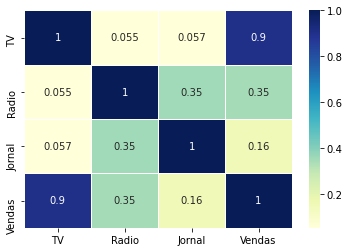

In [11]:
sns.heatmap(dados.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.show()

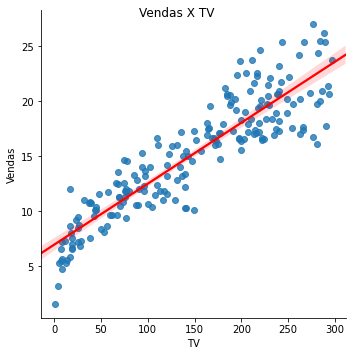

In [12]:
ax = sns.lmplot(x='TV', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X TV')
plt.show()

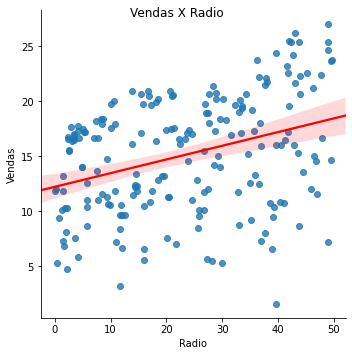

In [13]:
ax = sns.lmplot(x='Radio', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X Radio')
plt.show()

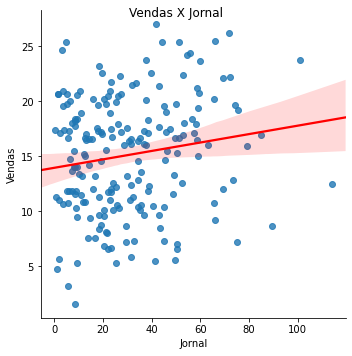

In [14]:
ax = sns.lmplot(x='Jornal', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X Jornal')
plt.show()

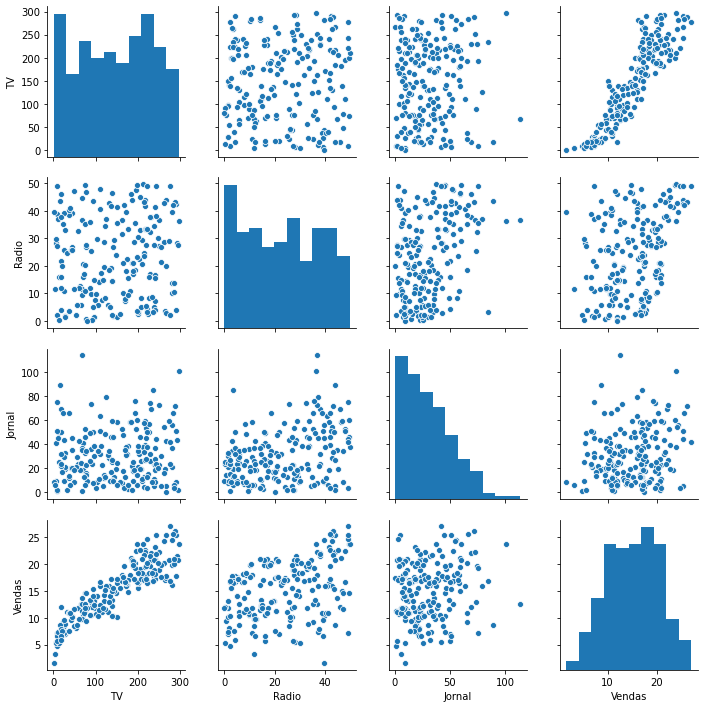

In [15]:
sns.pairplot(dados)
plt.show()

Conseguimos verificar que o meio de comunicação com maior correlação com as vendas é a TV. Este deve ser maior foco nos investimentos em marketing.

## Machine Learning - Utilizando algoritmos de Regressão


### Bases de treino e teste

In [16]:
from sklearn.model_selection import train_test_split

y = dados["Vendas"]
x = dados.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

### Vamos utilizar 2 modelos de regressão:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criando o modelo
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinando o modelo
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

### Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [18]:
from sklearn import metrics

# criando as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparando os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9643299348158557


O valor de R² da Árvore de Decisão é MAIOR que o valor da regressão linear. Utilizaremos então este modelo.

### Visualização Gráfica das Previsões

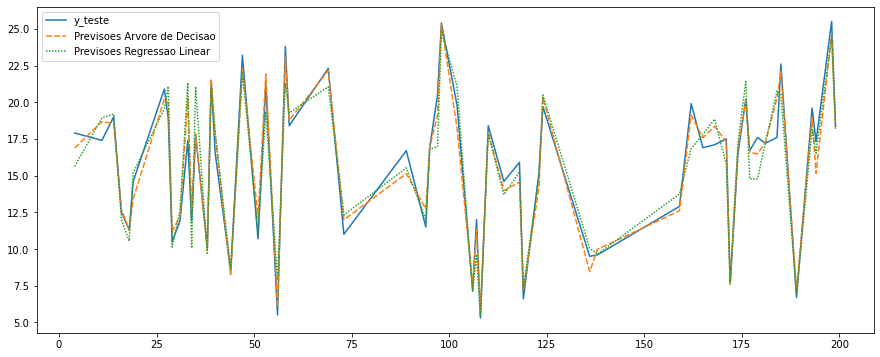

In [19]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Arvore de Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

### Fazendo previsão de vendas com dados de investimentos da tabela "novos"

In [20]:
dados2 = pd.read_csv("novos.csv")
dados2

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [21]:
previsao = modelo_arvoredecisao.predict(dados2)
previsao

array([ 7.813,  8.744, 19.869])

### A importância de cada variável para as vendas

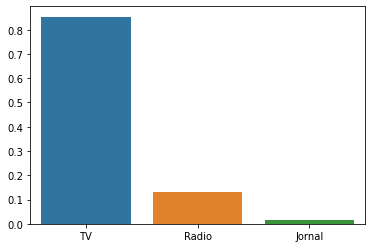

In [22]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

Na análise inicial realizada percebemos que o investimento em TV era o que possuía maior
correlação com as vendas.
Podemos perceber que em termos de importância para o modelo via Árvore de Decisão:
- O investimento em TV é ~85% relevante;
- O Rádio que também avaliamos anteriormente,
pouco mais de 10%;
- Jornal não chegando a mais de 5% de relevância